# PROGRAMMING SCHOOL WITH PANDAS

### Reading datas 

In [1]:
import pandas as pd 

In [2]:
name_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
name_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
name_f =name_f.rename(columns={'nome':'name', 'regiao':'region', 'freq':'freq', 'rank':'rank', 'sexo':'sex'})
name_m =name_f.rename(columns={'nome':'name', 'regiao':'region', 'freq':'freq', 'rank':'rank', 'sexo':'sex'})


In [4]:
name_f.head()

,name,region,freq,rank,sex
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [5]:
name_m.head()

,name,region,freq,rank,sex
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


### Sample in pandas

To perform random sampling. The number of samples to extract can be expressed in two alternative ways: specify the exact number of random rows to extract.
Returns a random sample row from the DataFrame.

In [6]:
name_m.sample(5)

,name,region,freq,rank,sex
142,RAISSA,0,113146,143,F
138,NEUSA,0,114846,139,F
192,ZILDA,0,82927,193,F
108,VILMA,0,145167,109,F
123,IVONE,0,131256,124,F


In [7]:
print('Number of Names:' + str(len(name_f) + len(name_m)))

Number of Names:400


Now we want to merge these two sets into a single dataframe containing the names of all students in the school. For this, we will create a variable frames that will receive a list containing our information.

In [8]:
frames = [name_f, name_m]
frames

[          name  region      freq  rank sex
 0        MARIA       0  11694738     1   F
 1          ANA       0   3079729     2   F
 2    FRANCISCA       0    721637     3   F
 3      ANTONIA       0    588783     4   F
 4      ADRIANA       0    565621     5   F
 ..         ...     ...       ...   ...  ..
 195     ROSANE       0     82203   196   F
 196    IVONETE       0     81878   197   F
 197    LUCIANE       0     81230   198   F
 198    ISADORA       0     81100   199   F
 199      NILZA       0     80128   200   F
 
 [200 rows x 5 columns],
           name  region      freq  rank sex
 0        MARIA       0  11694738     1   F
 1          ANA       0   3079729     2   F
 2    FRANCISCA       0    721637     3   F
 3      ANTONIA       0    588783     4   F
 4      ADRIANA       0    565621     5   F
 ..         ...     ...       ...   ...  ..
 195     ROSANE       0     82203   196   F
 196    IVONETE       0     81878   197   F
 197    LUCIANE       0     81230   198   F
 198 

In [9]:
frames

[          name  region      freq  rank sex
 0        MARIA       0  11694738     1   F
 1          ANA       0   3079729     2   F
 2    FRANCISCA       0    721637     3   F
 3      ANTONIA       0    588783     4   F
 4      ADRIANA       0    565621     5   F
 ..         ...     ...       ...   ...  ..
 195     ROSANE       0     82203   196   F
 196    IVONETE       0     81878   197   F
 197    LUCIANE       0     81230   198   F
 198    ISADORA       0     81100   199   F
 199      NILZA       0     80128   200   F
 
 [200 rows x 5 columns],
           name  region      freq  rank sex
 0        MARIA       0  11694738     1   F
 1          ANA       0   3079729     2   F
 2    FRANCISCA       0    721637     3   F
 3      ANTONIA       0    588783     4   F
 4      ADRIANA       0    565621     5   F
 ..         ...     ...       ...   ...  ..
 195     ROSANE       0     82203   196   F
 196    IVONETE       0     81878   197   F
 197    LUCIANE       0     81230   198   F
 198 

### concat in pandas
In the pd.concat() function, it is possible to specify which columns we want to concatenate, in this case just the name. At the end, we will use the to_frame() function to transform the resulting set into a dataframe.

In [10]:
list_names =pd.concat(frames)['name'].to_frame()
list_names

,name
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,ROSANE
196,IVONETE
197,LUCIANE
198,ISADORA


### INCLUDING STUDENTS ID

In [11]:
import numpy as np 

The idea now is to generate an ID for our male and female students, something that we can do randomly using Python's Numpy library, which by convention is nicknamed np.


In [12]:
np.random.seed(123)

In [13]:
total_student = len(list_names)
total_student

400

In [14]:
list_names['student_id'] = np.random.permutation(total_student) + 1 

In [15]:
list_names.sample(5)

,name,student_id
188,POLIANA,369
57,DAIANE,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


### INCLUDING STUDENT DOMAIN AND EMAIL 

Let's create domains that can be used for students and at the same time, let's think about creating a domain that will be used for students' email.

In [16]:
domains = ['@domainemail.com', '@serviceemail.com']

In [17]:
list_names['domains'] = np.random.choice(domains,total_student)

In [18]:
list_names.sample(5)

,name,student_id,domains
84,FATIMA,78,@domainemail.com
0,MARIA,331,@serviceemail.com
179,LILIANE,340,@domainemail.com
10,SANDRA,174,@domainemail.com
171,TERESINHA,45,@domainemail.com


Now let's use the created domains to automatically generate an email with the students' names.

In [19]:
list_names['email'] = list_names.name.str.cat(list_names.domains).str.lower()

In [20]:
list_names.head(10)

,name,student_id,domains,email
0,MARIA,235,@domainemail.com,maria@domainemail.com
1,ANA,43,@serviceemail.com,ana@serviceemail.com
2,FRANCISCA,304,@serviceemail.com,francisca@serviceemail.com
3,ANTONIA,156,@domainemail.com,antonia@domainemail.com
4,ADRIANA,343,@serviceemail.com,adriana@serviceemail.com
5,JULIANA,310,@serviceemail.com,juliana@serviceemail.com
6,MARCIA,55,@domainemail.com,marcia@domainemail.com
7,FERNANDA,288,@serviceemail.com,fernanda@serviceemail.com
8,PATRICIA,379,@serviceemail.com,patricia@serviceemail.com
9,ALINE,92,@domainemail.com,aline@domainemail.com


### INCLUIDING STUDENT COURSES

Now let's install some dependencies like html5lib and xml. 
They are dependencies that we will use to read files in html.

In [21]:
!pip install html5lib
!pip install lxml

In [22]:
import html5lib

In [23]:
#url = 'http://tabela-cursos.herokuapp.com/'
#courses = pd.read_html(url)
#courses

As the html link is not working, we thought it best to create a new txt file to see how it would work

In [24]:
courses = pd.read_csv('list_courses.txt', sep=',', 
                      names=['number_id', 'course_name'])

In [25]:
type(courses)

pandas.core.frame.DataFrame

In [26]:
# we can see the list of course_name
courses.course_name

0                programming logic
1                     Java for Web
2                       C# for Web
3                    Ruby on Rails
4                   Python Courses
5                   PHP with MySql
6                     .NET for web
7       New integrations with Java
8                    TDD with Java
9               Clean code with C#
10         Java Certification Prep
11                  Basic hardware
12           Persistence with .NET
13                Developing games
14                   Data analysis
15                basic statistics
16              Internet of Things
17          Functional programming
18          Best practices in Java
19    Object Orientation with Java
Name: course_name, dtype: object

We want to get the index starting by 1 instead of 0

In [27]:
courses.head()

,number_id,course_name
0,0,programming logic
1,1,Java for Web
2,2,C# for Web
3,3,Ruby on Rails
4,4,Python Courses


In [28]:
courses.set_index('number_id')

,course_name
number_id,
0,programming logic
1,Java for Web
2,C# for Web
3,Ruby on Rails
4,Python Courses
5,PHP with MySql
6,.NET for web
7,New integrations with Java
8,TDD with Java


In [29]:
courses.course_name

0                programming logic
1                     Java for Web
2                       C# for Web
3                    Ruby on Rails
4                   Python Courses
5                   PHP with MySql
6                     .NET for web
7       New integrations with Java
8                    TDD with Java
9               Clean code with C#
10         Java Certification Prep
11                  Basic hardware
12           Persistence with .NET
13                Developing games
14                   Data analysis
15                basic statistics
16              Internet of Things
17          Functional programming
18          Best practices in Java
19    Object Orientation with Java
Name: course_name, dtype: object

In [30]:
courses['number_id'] = courses.index + 1

In [31]:
courses = courses.set_index('number_id')
courses

,course_name
number_id,
1,programming logic
2,Java for Web
3,C# for Web
4,Ruby on Rails
5,Python Courses
6,PHP with MySql
7,.NET for web
8,New integrations with Java
9,TDD with Java


In [32]:
courses

,course_name
number_id,
1,programming logic
2,Java for Web
3,C# for Web
4,Ruby on Rails
5,Python Courses
6,PHP with MySql
7,.NET for web
8,New integrations with Java
9,TDD with Java


### ENROLL STUDENTS IN COURSES 

In [33]:
list_names.sample(5)

,name,student_id,domains,email
114,ELZA,320,@domainemail.com,elza@domainemail.com
57,DAIANE,303,@serviceemail.com,daiane@serviceemail.com
85,HELENA,221,@domainemail.com,helena@domainemail.com
183,IRACI,8,@domainemail.com,iraci@domainemail.com
189,DALVA,137,@domainemail.com,dalva@domainemail.com


In [34]:
list_names['registration'] = np.ceil(np.random.exponential(size= total_student)
                                     * 1.5).astype(int)

In [35]:
type(list_names)

pandas.core.frame.DataFrame

Let's now know how the courses are being distributed among the students.

In [36]:
list_names.registration.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: registration, dtype: float64

We want to see graphically how the courses are distributed between

In [37]:
import seaborn as sns

C:\Users\NMP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registration', ylabel='Density'>

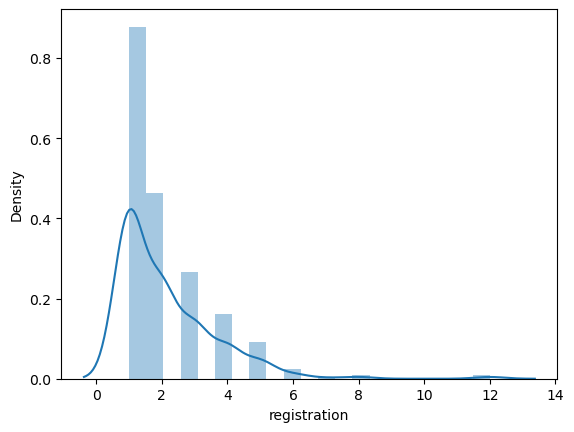

In [38]:
sns.distplot(list_names.registration)

As we expected, we have many students enrolled in one course, fewer enrolled in 2, even fewer in 3, and so on. We will move on to a visualization of the exact number of students with each number of enrollments, which we will get from the value_counts() function

In [39]:
list_names.registration.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: registration, dtype: int64

### SELECTING THE COURSES 

In [40]:
list_names.sample(3)

,name,student_id,domains,email,registration
105,MILENA,371,@domainemail.com,milena@domainemail.com,2
183,IRACI,8,@domainemail.com,iraci@domainemail.com,1
10,SANDRA,125,@domainemail.com,sandra@domainemail.com,2


To make this distribution, we will create three variables. The first one is all_registration, which will be initialized as an empty array. Next, we will create a variable x that will be called np.random.rand(20, a way to randomly calculate the 20 courses we have in the dataframe. Finally, we will have a variable prob (of probability) that will receive the division of x by sum(x) (the sum of x).

In [41]:
all_registration = []
x = np.random.rand(20)
prob = x / sum(x)

In [42]:
for index, row in list_names.iterrows():
    id = row.student_id
    registration = row.registration
    for i in range(registration):
        regist = [id, np.random.choice(courses.index, p = prob)]
        all_registration.append(regist)

registration = pd.DataFrame(all_registration, 
                            columns= ['student_id', 'course_id'])

In [43]:
registration.head()

,student_id,course_id
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [44]:
courses.head()

,course_name
number_id,
1,programming logic
2,Java for Web
3,C# for Web
4,Ruby on Rails
5,Python Courses


In [53]:
all_registered = registration.groupby('course_id').count().join(courses['course_name']).rename(columns={'student_id':'student_quantity'})

In [54]:
all_registered

,student_quantity,course_name
course_id,,
1,24,programming logic
2,52,Java for Web
3,54,C# for Web
4,51,Ruby on Rails
5,3,Python Courses
6,32,PHP with MySql
7,56,.NET for web
8,42,New integrations with Java
9,60,TDD with Java


### SAVING DATAFRAMES IN DIFFERENTS FORMATS

In [47]:
registration.head(3)

,student_id,course_id
0,235,8
1,43,6
2,304,7


#### Saving in csv format

In [50]:
registration.to_csv('registration_saving_in_csv.csv', index=False)

In [51]:
pd.read_csv('registration_saving_in_csv.csv')

,student_id,course_id
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11
...,...,...
849,323,15
850,323,9
851,383,7
852,366,7


In [56]:
all_registered.to_csv('all_registration.csv', index=False)

#### Saving in json format

In [52]:
registration_saving_in_json = registration.to_json()
registration_saving_in_json

'{"student_id":{"0":235,"1":43,"2":304,"3":304,"4":304,"5":304,"6":304,"7":156,"8":156,"9":156,"10":156,"11":156,"12":343,"13":310,"14":55,"15":55,"16":55,"17":288,"18":288,"19":379,"20":92,"21":174,"22":218,"23":218,"24":218,"25":218,"26":218,"27":218,"28":218,"29":217,"30":34,"31":34,"32":34,"33":185,"34":185,"35":185,"36":185,"37":185,"38":347,"39":347,"40":191,"41":163,"42":163,"43":42,"44":10,"45":10,"46":10,"47":10,"48":200,"49":200,"50":287,"51":287,"52":287,"53":287,"54":287,"55":80,"56":173,"57":16,"58":16,"59":49,"60":12,"61":12,"62":240,"63":240,"64":242,"65":328,"66":172,"67":172,"68":172,"69":103,"70":284,"71":284,"72":284,"73":284,"74":284,"75":284,"76":192,"77":192,"78":192,"79":192,"80":350,"81":262,"82":262,"83":262,"84":338,"85":338,"86":333,"87":76,"88":76,"89":76,"90":76,"91":76,"92":297,"93":297,"94":297,"95":238,"96":238,"97":238,"98":296,"99":296,"100":296,"101":296,"102":268,"103":268,"104":268,"105":268,"106":158,"107":259,"108":259,"109":259,"110":259,"111":25

#### Saving in HTML format

In [57]:
all_regist_html = all_registered.to_html()

In [59]:
print(all_regist_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>student_quantity</th>
      <th>course_name</th>
    </tr>
    <tr>
      <th>course_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>programming logic</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52</td>
      <td>Java for Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>54</td>
      <td>C# for Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>Python Courses</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP with MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET for web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>42</td>
      <td>New integrations with Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>60</td>
      <td>TDD 

### Creating a Sql database

For us to work, we will need to install the SQLAlchemy library through !pip3 install.
From this library, we will import the create_engine, MetaData and Table libs.

In [61]:
from sqlalchemy import create_engine, MetaData, Table

In [63]:
engine = create_engine('sqlite:///:memory:')

In [64]:
engine

Engine(sqlite:///:memory:)

In [65]:
type(engine)

sqlalchemy.engine.base.Engine

In [66]:
all_registered.to_sql('all_registered_sql', engine)

20

In [67]:
print(engine.table_names())

['all_registered_sql']


C:\Users\NMP\AppData\Local\Temp\ipykernel_21832\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


### Searching in Sql

In [68]:
query = 'select * from all_registered_sql where student_quantity < 20'

In [69]:
pd.read_sql(query, engine)

,course_id,student_quantity,course_name
0,5,3,Python Courses
1,14,18,Developing games
2,19,6,Best practices in Java


From the read_sql_table() command, we can search an entire table, just passing the table name ('all_registered_sql'), the engine and which columns we want to filter. This time, we will first ask for the name of the course followed by the number of all the students.

In [71]:
all_access_registered = pd.read_sql_table('all_registered_sql', engine, columns=['course_name', 'student_quantity'])
all_access_registered

,course_name,student_quantity
0,programming logic,24
1,Java for Web,52
2,C# for Web,54
3,Ruby on Rails,51
4,Python Courses,3
5,PHP with MySql,32
6,.NET for web,56
7,New integrations with Java,42
8,TDD with Java,60
9,Clean code with C#,68


In [73]:
acces_over_50 = all_access_registered.query('student_quantity > 50')
acces_over_50

,course_name,student_quantity
1,Java for Web,52
2,C# for Web,54
3,Ruby on Rails,51
6,.NET for web,56
8,TDD with Java,60
9,Clean code with C#,68
10,Java Certification Prep,78
14,Data analysis,57
16,Internet of Things,71
17,Functional programming,60
